# 머신러닝 개요와 선형회귀

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

style_name = 'bmh' #bmh
mpl.style.use(style_name)
np.set_printoptions(precision=4, linewidth =150)

style = plt.style.library[style_name]
style_colors = [ c['color'] for c in style['axes.prop_cycle'] ]

## 머신러닝?

- 넓은 의미 : 컴퓨터를 이용한 문제 해결에 있어서 지식기반, 규칙 기반 방법이 아닌 데이터와 범용 알고리즘으로 퍼포먼스를 개선하는 방법 

> Samuel, A. L. (1959) : "Programming computers to learn from experience should eventually eliminate the need for much of this detailed programming effort" <br/> - “Some Studies in Machine Learning Using the Game of Checkers” in IBM Journal of Research and Development (Volume:3, Issue: 3), p. 210, 기계학습, 오일석, 한빛미디어


> Tom Mitchell (1998) : Well-posed Learning Problem: A computer program is said to learn from experience E with respect to some task T and some performance measure P, if its performance on T, as measured by P, improves with experience E.<br/>-“Machine Learning”, Coursera, Andrew Ng

- 좁은 의미 : 주어진 데이터를 가장 잘 표현하는 함수를 찾는 것


## 아이가 그림을 그린다면?

<table>
    <tr>
        <td><img src="imgs/sketch-01.png" width="350"/></td>
        <td><img src="imgs/sketch-02.png" width="350"/></td>
    </tr>
    <tr>
        <td><img src="imgs/sketch-03.png" width="350"/></td>
        <td><img src="imgs/sketch-04.png" width="350"/></td>
    </tr>
</table>

- 아이는 T, P, E를 반복하면서 적합한 선을 그리는 법을 배워간다.

- Task T  : 선을 그린다.

- Measure P : 선이 점에 잘 맞는가?

- Experience E : 만족할 때 까지 계속 선을 그린다. 빨간점에서 선이 멀어지면 좋지 않다.

## 수업 범위

### 데어터과학 벤다이어그램

- 데이터 과학보다는 머신러닝에 집중

- 도메인 전문 지식은 다루지 않음

<img src="imgs/03-Data_Science_VD.png" width="450"/>
<h5 align="center">http://drewconway.com/zia/2013/3/26/the-data-science-venn-diagram</h5>

## 머신러닝 분류

### 지도학습Supervised

#### 회귀 문제Regression : 선형 회귀Linear Regression

- 정답 : 연속된 실수
- 예 : 대지면적에 따른 집값, 시간에 따른 트랜지스터 집적 개수, 기온에 따른 빙과류 판매량

<img src="imgs/05-gaussian-linreg.png"/>

#### 분류 문제Classification : 로지스틱 회귀Logistic Regression

- 정답 : (0,1) 또는 (0, 1, …, K)
- 예 : 개-고양이 분류, 양성종양-악성종양 분류, …

<img src="imgs/04-logistic-sklearn.png"/>
<h5 align="center">http://scikit-learn.org/stable/auto_examples/linear_model/plot_iris_logistic.html#sphx-glr-auto-examples-linear-model-plot-iris-logistic-py</h5>


### 비지도학습Unsupervised

- K-means, PCA, kNN ......

## 직선찾기

### 데이터 준비

- 앤드류 응 교수의 코세라 강의 '머신러닝'에서 사용하는 데이터를 'data_1d.npz'로 만들어 사용

- 데이터 파일 생성 스크립트 : save_data_1d.ipynb

In [2]:
# 데이터 로드
D = np.load('data_1d.npz')

# X : (N,2), y : (N,1)
X = D['X']
y = D['y']

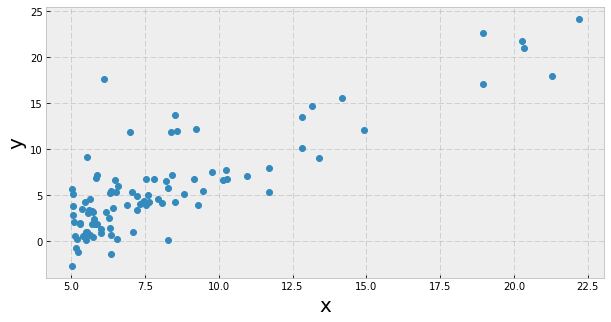

In [3]:
plt.figure(figsize=(10,5))
plt.plot(X[:,1], y, 'o')
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

### 개념

- 아이의 직선 그리기처럼……

- 모든 점을 지나는 직선은 그릴 수 없으니 선을 그려보고 점과 선과의 거리를 최대한 줄여보자

- Task T  : 선을 그린다.
    - $y=w_0 + w_1 x$
    - $w_0$와 $w_1$을 결정하기

- Measure P : 선과 점의 수직거리의 총합 $\to$ 작을 수 록 좋다!!

- Experience E : 선을 그리고 P를 측정하기를 반복

<img src="imgs/lin-reg-concept.png" width="650"/>

- 위 그림의 두 직선에 해당하는 에러량

- 두 직선에서 다른 것은 직선의 위치와 기울기를 결정하는 계수 벡터 $\color{Green}{\mathbf{w}_g}$, $\color{Red}{\mathbf{w}_r}$ 이고 에러를 최소화하기 위해 우리가 결정해야 할 것

$$
\color{Green}{\text{ERROR}} = \frac{1}{2N} \sum_{n=1}^N \left\{ \color{Green}{h(x_n, \mathbf{w}_{g})}  - \color{RoyalBlue}{y_n} \right\}^2 
$$

$$
\color{Red}{\text{ERROR}} = \frac{1}{2N} \sum_{n=1}^N \left\{ \color{Red}{h(x_n, \mathbf{w}_{r})}  - \color{RoyalBlue}{y_n} \right\}^2 
$$

- 이상의 개념에 포함된 수학과 구현을 수업을 통해 배우게 됨

- 우선 개요에서는 어떤 방식으로 문제를 푸는지 구체적인 데이터를 예로 들어 소개
    - 경사하강법을 이용한 방법
    - 정규방적식을 이용한 방법

### 경사하강법을 이용한 선형회귀


- 다음 코드는 가장 기본적인 선형회귀를 경사하강법을 사용하여 수행한 것

- 핵심코드는 다음 3줄로 여기에 행렬과 벡터의 연산, 미분, 최적화 내용이 들어 있음

```python
for i in range(num_iters) :
    #           이 부분에 미분과 선형대수의 개념이 있음
    c = (1/n) * np.dot(X.T, np.dot(X,w) - y)
    # 이 부분에 최적화의 개념이 있음
    w -= alpha * c
```

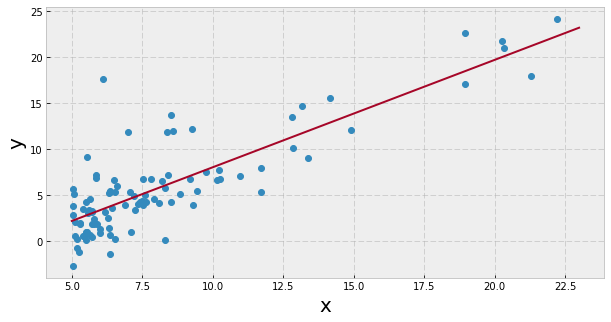

Regression coef. w0=-3.621672, w1=1.165496


In [4]:
num_iters = 1500
n = X.shape[0]
w = np.random.rand(2).reshape(2,1)
alpha = 0.01

# 여기서 우리의 경험 E를 반복하면서 태스크 T를 개선해 나간다.
for i in range(num_iters) :
    #           이 부분에 미분과 선형대수의 개념이 있음
    c = (1/n) * np.dot(X.T, np.dot(X,w) - y)
    # 이 부분에 최적화의 개념이 있음
    w -= alpha * c

x = np.linspace(5, 23, 100)
pred = w[0]+ w[1]*x

plt.figure(figsize=(10,5))
plt.plot(X[:,1], y, 'o', x, pred)
plt.xlabel('x', fontsize=20)
plt.ylabel('y', fontsize=20)
plt.show()

print("Regression coef. w0={:f}, w1={:f}".format(w[0,0], w[1,0]))

## 곡선 찾기

### 데이터 준비

- 년도별 트랜지스터의 집적도를 나타내는 moore의 법칙 데이터 활용

- Transistor count from wiki : https://en.wikipedia.org/wiki/Transistor_count

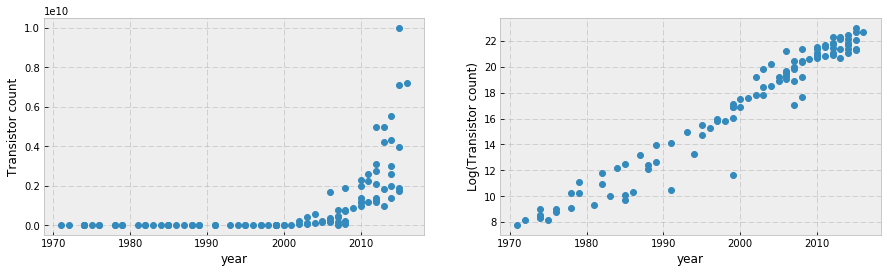

In [5]:
plt.rcParams["figure.figsize"] = (10,5)
x = np.linspace(1971, 2019, 100)

# 데이터 로드
# https://en.wikipedia.org/wiki/Transistor_count
D = np.load('moore.npz')

# X : (N,2), y : (N,1)
X = D['X']
y = D['y']


#########################################################################
# 그림을 그리면 대충 지수적으로 증가하는 것 처럼 보임
# y에 로그 취해서 선형화된 그림과 비교
plt.rcParams["figure.figsize"] = (15,4)

log_y = np.log(y)
fig, axs = plt.subplots(1, 2)
axs[0].plot(X, y, 'o')
axs[0].set_xlabel('year')
axs[0].set_ylabel('Transistor count')

axs[1].plot(X, log_y, 'o')
axs[1].set_xlabel('year')
axs[1].set_ylabel('Log(Transistor count)')
plt.show()

### 개념

- 데이터를 직선으로 피팅하기 부적합

- 데이터가 지수적 증가 형태를 보이므로 로그를 취해서 대충 선형으로 변환

- 이후 직선찾기 개념을 그대로 이용하고 지수를 취해서 다시 곡선으로 바꿈

- 직접 곡선 기저함수를 사용하는 법도 4주차에 다룸

### 정규방정식을 이용한 선형회귀

- 다만 위와 다르게 이후 회귀 과정은 반복법을 쓰지 않고 극대, 극소의 개념을 써서 한번에 답을 찾는다.

- 회귀 후 예측 곡선으로 2018년에 집적도 예측

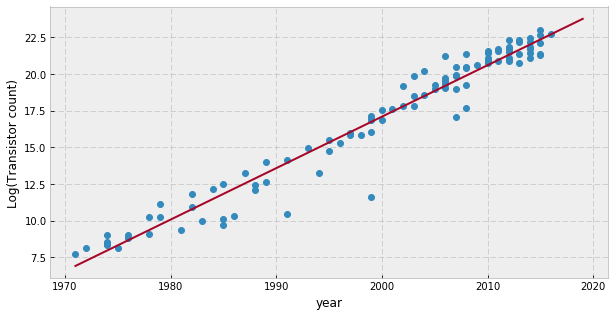

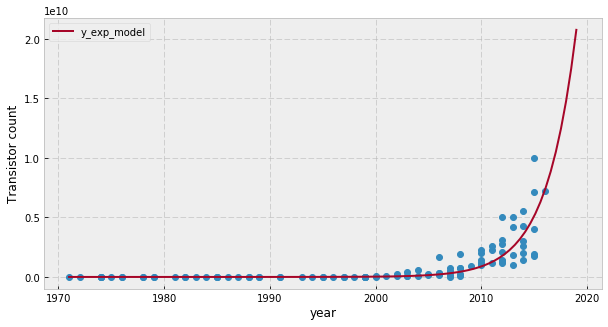

w : [-6.8500e+02  3.5104e-01]
Prediction 2018 : 20,768,229,792


In [6]:
#########################################################################
# y에 로그를 취해서 선형으로 만든 것을 바탕으로 직선을 찾기
# 정규방정식을 이용
plt.rcParams["figure.figsize"] = (10,5)

# 여기서 더 이상 반복하지않고 한번에 답을 찾는다.
X              = np.hstack((np.ones(X.shape[0]).reshape(-1,1), X.reshape(-1,1))) #design matrix
popt_exp_model = np.linalg.solve(np.dot(X.T, X), np.dot(X.T , log_y.reshape(-1,1))).reshape(-1) #normal eq.
y_exp_model    = np.exp(popt_exp_model[1]*x + popt_exp_model[0])

########################################################################
# 선형화된 데이터와 직선 그리기
plt.plot(X[:,1], log_y, 'o')
plt.plot(x, popt_exp_model[0] + popt_exp_model[1]*x)
plt.xlabel('year')
plt.ylabel('Log(Transistor count)')
plt.show()

########################################################################
# 데이터와 회귀 곡선 그리기
plt.plot(X[:,1], y, 'o')
plt.plot(x, y_exp_model, label="y_exp_model")
plt.xlabel('year')
plt.ylabel('Transistor count')
plt.legend()
plt.show()

print("w : {}".format(popt_exp_model))
print( "Prediction 2018 : {:,d}".format( int(y_exp_model[-1]) ) )

$$
\begin{align}
&\log(\text{transistor count}) = 0.351x - 685 \\[5pt]
&e^{\log(\text{transistor count})} = e^{0.351x - 685} \\[5pt]
&\text{transistor count} = e^{-685}e^{0.351x} = (3.22 \times 10^{-298}) e^{0.351x}
\end{align}
$$

In [7]:
print(np.exp(-6.8500e+02))
print(np.log(3E-298))

3.223145390850647e-298
-685.0717454235576


### Excel의 회귀 결과와 비교

- 엑셀로 선형회귀 작업을 할 수 있음

- 데이터 선택 → 분산형 그래프 삽입 → 차트도구:디자인에서 차트레이아웃3 선택 → 직선 더블클릭 → ‘지수’ 선택 

- 회귀 결과는 우리 코딩 결과와 일치

<img src="imgs/excel-moore.png" width="700">

## 목표

- 다음 식을 적어도 “합리적 수준”에서 이해하고 구현하기 위해……

$$
\begin{align}
\mathbf{w} &= \mathbf{w} - \alpha \frac{\partial}{\partial \mathbf{w}} \left( \frac{1}{2N} \sum_{n=1}^N \{ h(x_n, \mathbf{w})- y_n \}^2 \right) \\[5pt]
\mathbf{w} &= \left(\mathbf{X}^{\text{T}}\mathbf{X}\right)^{-1} \mathbf{X}^{\text{T}} \mathbf{y}
\end{align}
$$

- 파이썬 기본 문법을 익히고,

- 함수, 미분, 행렬과 벡터의 연산, 약간의 최적화 이론을 공부


In [1]:
%%html
<link href='https://fonts.googleapis.com/earlyaccess/notosanskr.css' rel='stylesheet' type='text/css'>
<!--https://github.com/kattergil/NotoSerifKR-Web/stargazers-->
<link href='https://cdn.rawgit.com/kattergil/NotoSerifKR-Web/5e08423b/stylesheet/NotoSerif-Web.css' rel='stylesheet' type='text/css'>
<!--https://github.com/Joungkyun/font-d2coding-->
<link href="http://cdn.jsdelivr.net/gh/joungkyun/font-d2coding/d2coding.css" rel="stylesheet" type="text/css">
<style>
    h1     { font-family: 'Noto Sans KR' !important; color:#348ABD !important;   }
    h2     { font-family: 'Noto Sans KR' !important; color:#467821 !important;   }
    h3, h4 { font-family: 'Noto Sans KR' !important; color:#A60628 !important;   }
    p:not(.navbar-text) { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%;  text-indent: 10px; }
    li:not(.dropdown):not(.p-TabBar-tab):not(.p-MenuBar-item):not(.jp-DirListing-item):not(.p-CommandPalette-header):not(.p-CommandPalette-item):not(.jp-RunningSessions-item)
            { font-family: 'Noto Serif KR', 'Nanum Myeongjo'; font-size: 12pt; line-height: 200%; }
    table  { font-family: 'Noto Sans KR' !important;  font-size: 11pt !important; }           
    li > p  { text-indent: 0px; }
    li > ul { margin-top: 0px !important; }       
    sup { font-family: 'Noto Sans KR'; font-size: 9pt; } 
    code, pre  { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important; line-height: 130% !important;}
    .code-body { font-family: D2Coding, 'D2 coding' !important; font-size: 12pt !important;}
    .ns        { font-family: 'Noto Sans KR'; font-size: 15pt;}
    .summary   {
                   font-family: 'Georgia'; font-size: 12pt; line-height: 200%; 
                   border-left:3px solid #FF0000; 
                   padding-left:20px; 
                   margin-top:10px;
                   margin-left:15px;
               }
    .green { color:#467821 !important; }
    .comment { font-family: 'Noto Sans KR'; font-size: 10pt; }
</style>